In [2]:
import numpy as np
from pylab import * 
import matplotlib.pyplot as plt

def conv(x):
    return x.replace(",", ".").encode()
%matplotlib inline

In [3]:
altcrystal1_a4_Apm = np.genfromtxt((conv(x) for x in open("A4 Festkörper/altcrystal1_a4_Apm.csv")), delimiter =";")
methan_A05_2ndtry = np.genfromtxt((conv(x) for x in open("A4 Festkörper/methan_A0.5_2ndtry.CSV")), delimiter =";")
methan1_std_A4 = np.genfromtxt((conv(x) for x in open("A4 Festkörper/methan1_std_A4.CSV")), delimiter =";")
salt_pvdf_trfe_a4_apm = np.genfromtxt((conv(x) for x in open("A4 Festkörper/salt+pvdf-trfe_a4_apm.CSV")), delimiter =";")

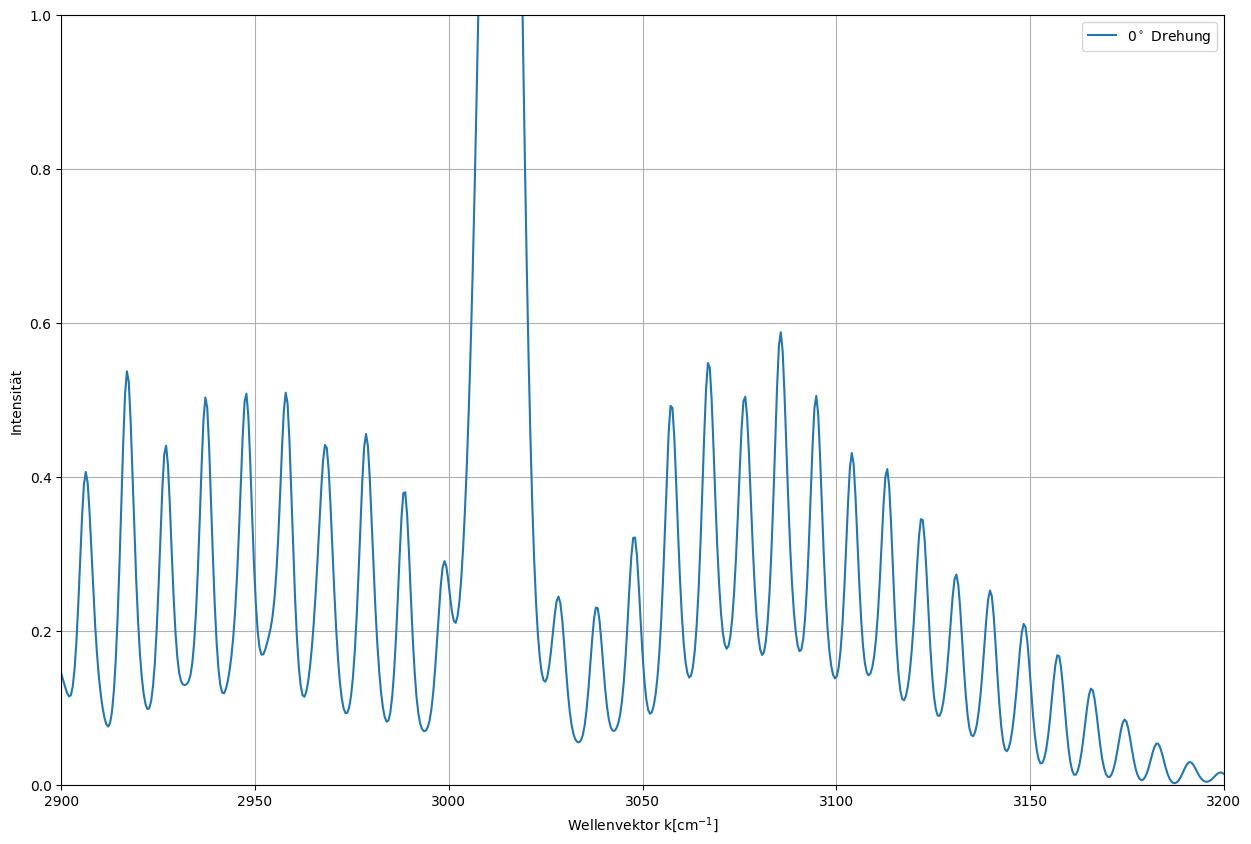

In [12]:
plt.figure(figsize = [15,10])
plt.plot(methan1_std_A4 [:,0],(methan1_std_A4 [:,1]) ,label= r"0$^\circ$ Drehung")
#plt.plot(methan_A05_2ndtry [:,0],(methan_A05_2ndtry[:,1]) ,label= r"0$^\circ$ Drehung")

plt.grid(True)

plt.ylabel("Intensität")
plt.legend(loc = 0)
#plt.xlim(2945,2960)
plt.axis([2900,3200,0,1])
plt.xlabel(r"Wellenvektor k$[\mathrm{cm}^{-1}]$")
plt.show()